# Changes in attachement time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

### PC Tangle CLength = 10 rate = 3 attach time = 20

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)


    ### Running the simulation  ###
    attachment_flag = False

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        if (t.time > 40) and (attachment_flag == False):
            ng.nodes[-1].issue_bad_transaction()
            PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
            w.PC_add_time = t.time
            w.update()
            ng.nodes[-1].spam_transactions(10)
            badNode = ng.nodes[-1]
            print(badNode.chain)
            attachment_flag = True
        else:
            ng.nodes[node].issue_transaction()
            w.update()
            print(t.time)

    w.output_to_sheet()



First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000013F963192B0>]
Edges []
Node IDS [0]
Weights [[0, 1066, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000013F963192B0>, <tangle.node object at 0x0000013F96230FE0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1066, 1], [1, 1869, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000013F963192B0>, <tangle.node object at 0x0000013F96230FE0>, <tangle.node object at 0x0000013F96346000>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1066, 1], [1, 1869, 1], [2, 1499, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000013F963192B0>, <tangle.node object at 0x0000013F96230FE0>, <tangle.node object at 0x0000013F96346000>, <tangle.node object at 0x0000013F946ED9D0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 0), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1066, 1], [1, 1869, 1], [2, 1499, 1], [3, 793, 1]]
Finish

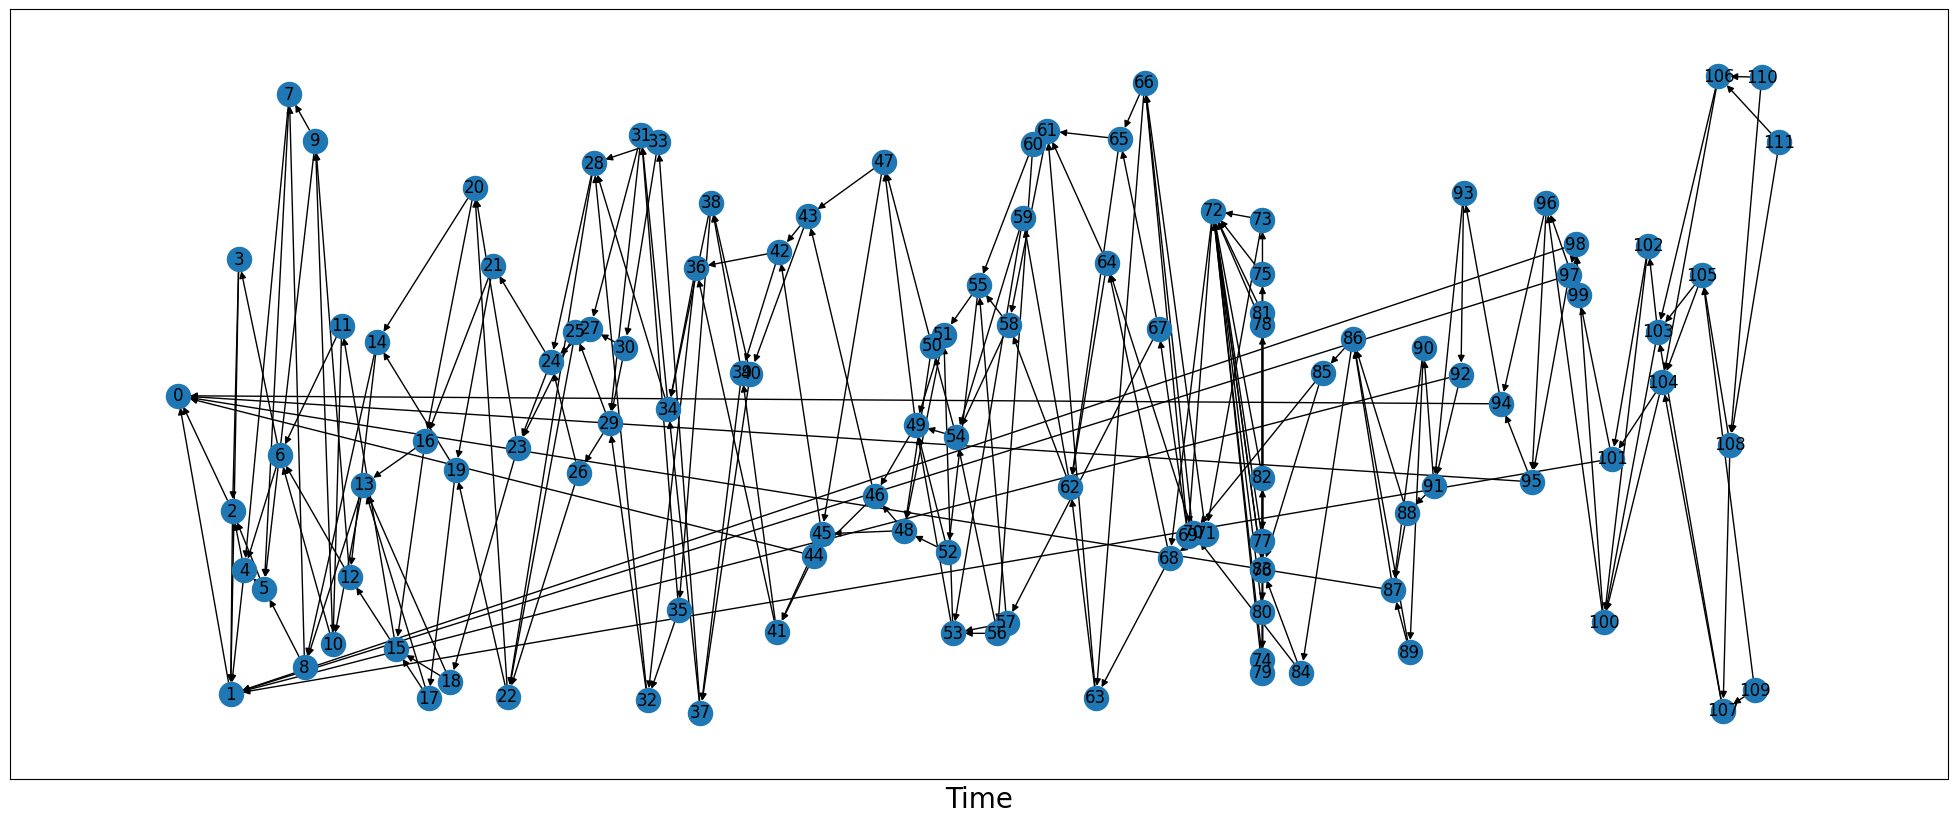

In [3]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 5, 7, 7, 7, 8, 9, 10, 11, 14, 14, 15, 16, 16, 17, 17, 17, 18, 22, 24, 24, 24, 26, 26, 29, 29, 30, 30, 31, 31, 33, 35, 36, 36, 38, 40, 40, 42, 43, 44, 44, 44, 44, 44, 48, 49, 49, 49, 49, 49, 53, 54, 56, 56, 58, 59, 60, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 75, 79, 81, 81, 82, 82, 84, 84, 88, 88, 89, 91, 91, 92, 92, 93, 95, 96, 96, 97, 97, 99, 99, 99, 101, 103, 105, 105] [1.0, 1.973767829479186, 2.045856107160881, 2.2807054919381184, 2.491128431924967, 3.235086216495212, 3.824567606529462, 4.18274521946588, 4.755092835352422, 5.160824306121906, 5.8210011072431955, 6.151559986154944, 6.452347670619489, 6.965987187939769, 7.4811140728069105, 8.193378630580032, 9.28628036496239, 9.42129952714387, 10.236323431111147, 10.436630109275002, 11.14394875001825, 11.845563732441667, 12.396117637687537, 12.766862883802938, 14.016452714365434, 14.937444976633131, 15.054605031699392, 15.489098427809633, 15.635012856311945, 16.22039563678911,

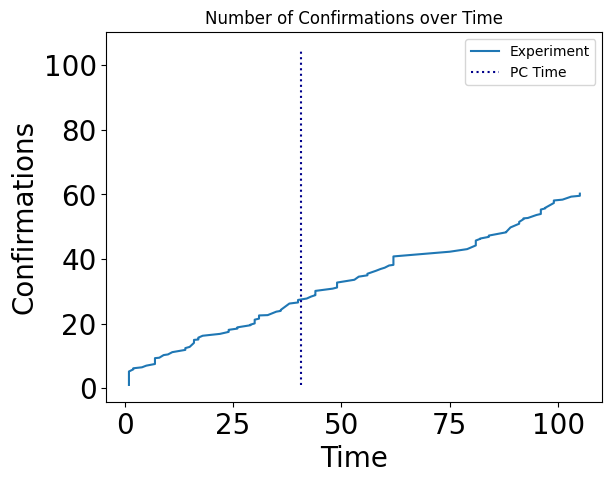

In [4]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [5]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 153], [2, 1.0, 148], [3, 1.0, 143], [4, 1.0441176470588236, 136], [5, 1.25, 164], [6, 1.614814814814815, 135], [7, 2.591194968553459, 159], [8, 3.5314685314685317, 143], [9, 5.134751773049645, 141], [10, 6.701388888888889, 144], [11, 7.563758389261745, 149], [12, 9.521428571428572, 140], [13, 10.608433734939759, 166], [14, 12.546666666666667, 150], [15, 14.210526315789474, 171], [16, 15.833333333333334, 150], [17, 17.22077922077922, 154], [18, 18.54609929078014, 141], [19, 19.84328358208955, 134], [20, 21.512820512820515, 156], [21, 22.736842105263158, 133], [22, 24.376623376623378, 154], [23, 25.926829268292682, 164], [24, 27.37748344370861, 151], [25, 28.59119496855346, 159], [26, 30.62015503875969, 129], [27, 31.818181818181817, 176], [28, 33.29251700680272, 147], [29, 35.3051948051948, 154], [30, 36.659574468085104, 141], [31, 38.07843137254902, 153], [32, 39.859154929577464, 142], [33, 40.61073825503356, 149], [34, 42.32051282051282, 156], [35, 43.94904458598726, 157], [

[[1, 1.0, 153], [2, 1.0, 148], [3, 1.0, 143], [4, 1.0441176470588236, 136], [5, 1.25, 164], [6, 1.614814814814815, 135], [7, 2.591194968553459, 159], [8, 3.5314685314685317, 143], [9, 5.134751773049645, 141], [10, 6.701388888888889, 144], [11, 7.563758389261745, 149], [12, 9.521428571428572, 140], [13, 10.608433734939759, 166], [14, 12.546666666666667, 150], [15, 14.210526315789474, 171], [16, 15.833333333333334, 150], [17, 17.22077922077922, 154], [18, 18.54609929078014, 141], [19, 19.84328358208955, 134], [20, 21.512820512820515, 156], [21, 22.736842105263158, 133], [22, 24.376623376623378, 154], [23, 25.926829268292682, 164], [24, 27.37748344370861, 151], [25, 28.59119496855346, 159], [26, 30.62015503875969, 129], [27, 31.818181818181817, 176], [28, 33.29251700680272, 147], [29, 35.3051948051948, 154], [30, 36.659574468085104, 141], [31, 38.07843137254902, 153], [32, 39.859154929577464, 142], [33, 40.61073825503356, 149], [34, 42.32051282051282, 156], [35, 43.94904458598726, 157], [

Text(0, 0.5, 'Confirmations')

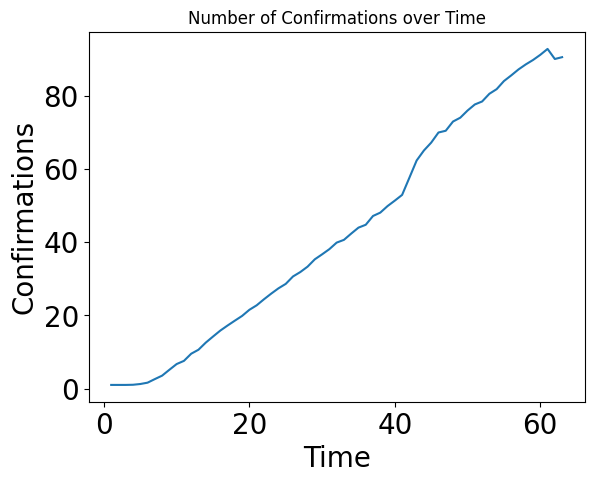

In [6]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [7]:
df.to_csv("pc-r3-c10-a40 100")

100 tests were run and preliminary results show a difference in the early PC attachment approval rate at chain length 10.

### PC Tangle CLength = 20

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Running the simulation  ###
    attachment_flag = False

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        if (t.time > 40) and (attachment_flag == False):
            ng.nodes[-1].issue_bad_transaction()
            PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
            w.PC_add_time = t.time
            w.update()
            ng.nodes[-1].spam_transactions(20)
            badNode = ng.nodes[-1]
            print(badNode.chain)
            attachment_flag = True
        else:
            ng.nodes[node].issue_transaction()
            w.update()
            print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001B869001820>]
Edges []
Node IDS [0]
Weights [[0, 398, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001B869001820>, <tangle.node object at 0x000001B867B27050>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 398, 1], [1, 1630, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001B869001820>, <tangle.node object at 0x000001B867B27050>, <tangle.node object at 0x000001B869297560>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 398, 1], [1, 1630, 1], [2, 1418, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001B869001820>, <tangle.node object at 0x000001B867B27050>, <tangle.node object at 0x000001B869297560>, <tangle.node object at 0x000001B869002390>]
Edges [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 398, 1], [1, 1630, 1], [2, 1418, 1], [3, 1481, 1]]
Finished 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 8, 9, 10, 10, 10, 11, 12, 15, 15, 15, 15, 15, 15, 19, 20, 22, 22, 23, 24, 24, 24, 27, 28, 29, 29, 29, 30, 33, 34, 34, 34, 35, 38, 39, 39, 40, 42, 44, 44, 44, 44, 46, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 50, 59, 71, 72, 73, 77, 77, 77, 77, 79, 81, 81, 81, 81, 81, 82, 84, 84, 86, 87, 88, 88, 88, 91, 93, 94, 96, 97] [1.0, 1.755412472529164, 2.028910877337569, 2.49025919244346, 3.9166384160368826, 4.854353586103712, 5.474740508120968, 5.911138125769556, 6.542666200836148, 7.615440716483189, 8.240180963198407, 9.383790658443662, 11.14066061715283, 12.593604076885812, 13.793965985238525, 14.243664361743708, 14.525593943072103, 14.845842233632078, 15.396501326422102, 16.78586688056667, 16.851350620588274, 17.670502009794887, 17.836632435797227, 18.529202893161813, 19.1514834143819, 19.86172160560318, 20.288254512566382, 21.49964830137681, 21.826644537013486, 22.790941815588308, 22.88957284592235, 23.18

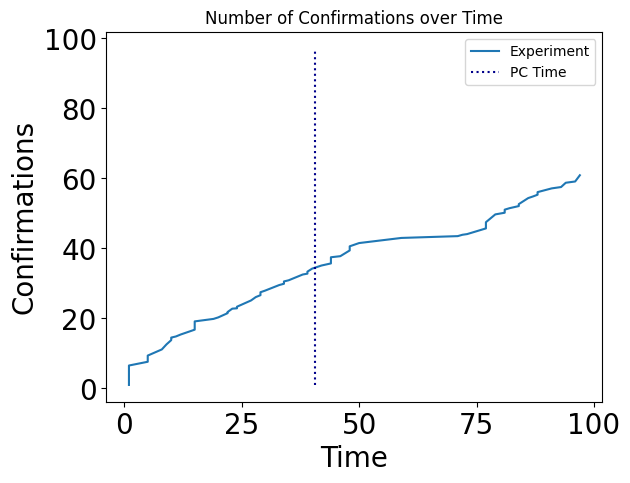

In [3]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [4]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 144], [2, 1.0, 152], [3, 1.0, 149], [4, 1.0337837837837838, 148], [5, 1.267515923566879, 157], [6, 1.826086956521739, 161], [7, 2.6620689655172414, 145], [8, 3.8958333333333335, 144], [9, 5.1940298507462686, 134], [10, 6.1558441558441555, 154], [11, 8.175182481751825, 137], [12, 9.782894736842104, 152], [13, 10.741496598639456, 147], [14, 12.756410256410257, 156], [15, 14.27450980392157, 153], [16, 15.843537414965986, 147], [17, 17.32704402515723, 159], [18, 18.81366459627329, 161], [19, 20.396103896103895, 154], [20, 21.779141104294478, 163], [21, 23.41614906832298, 161], [22, 24.914285714285715, 140], [23, 26.66470588235294, 170], [24, 27.930232558139537, 129], [25, 29.130177514792898, 169], [26, 30.533333333333335, 150], [27, 32.29333333333334, 150], [28, 33.852112676056336, 142], [29, 35.651612903225804, 155], [30, 36.859756097560975, 164], [31, 38.760736196319016, 163], [32, 40.095238095238095, 147], [33, 41.79113924050633, 158], [34, 42.97278911564626, 147], [35, 44.197

[[1, 1.0, 144], [2, 1.0, 152], [3, 1.0, 149], [4, 1.0337837837837838, 148], [5, 1.267515923566879, 157], [6, 1.826086956521739, 161], [7, 2.6620689655172414, 145], [8, 3.8958333333333335, 144], [9, 5.1940298507462686, 134], [10, 6.1558441558441555, 154], [11, 8.175182481751825, 137], [12, 9.782894736842104, 152], [13, 10.741496598639456, 147], [14, 12.756410256410257, 156], [15, 14.27450980392157, 153], [16, 15.843537414965986, 147], [17, 17.32704402515723, 159], [18, 18.81366459627329, 161], [19, 20.396103896103895, 154], [20, 21.779141104294478, 163], [21, 23.41614906832298, 161], [22, 24.914285714285715, 140], [23, 26.66470588235294, 170], [24, 27.930232558139537, 129], [25, 29.130177514792898, 169], [26, 30.533333333333335, 150], [27, 32.29333333333334, 150], [28, 33.852112676056336, 142], [29, 35.651612903225804, 155], [30, 36.859756097560975, 164], [31, 38.760736196319016, 163], [32, 40.095238095238095, 147], [33, 41.79113924050633, 158], [34, 42.97278911564626, 147], [35, 44.197

Text(0, 0.5, 'Confirmations')

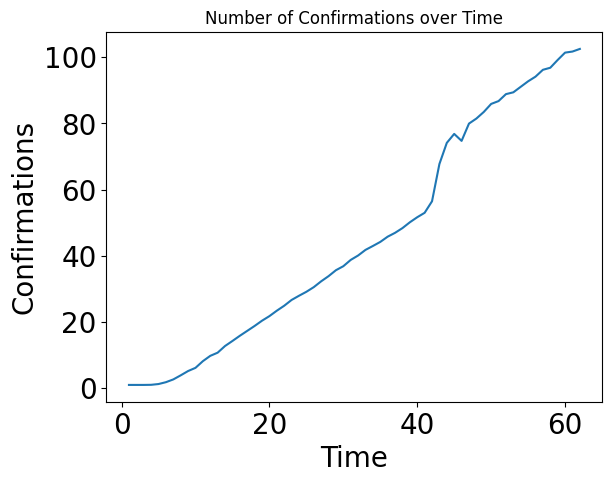

In [5]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [6]:
df.to_csv("pc-r3-c20-a40 100")

### Clength = 5

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Running the simulation  ###
    attachment_flag = False

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        if (t.time > 40) and (attachment_flag == False):
            ng.nodes[-1].issue_bad_transaction()
            PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
            w.PC_add_time = t.time
            w.update()
            ng.nodes[-1].spam_transactions(5)
            badNode = ng.nodes[-1]
            print(badNode.chain)
            attachment_flag = True
        else:
            ng.nodes[node].issue_transaction()
            w.update()
            print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B6DC0ADF70>]
Edges []
Node IDS [0]
Weights [[0, 1885, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B6DC0ADF70>, <tangle.node object at 0x000002B6DAA48C20>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1885, 1], [1, 1427, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B6DC0ADF70>, <tangle.node object at 0x000002B6DAA48C20>, <tangle.node object at 0x000002B6DA8EDEE0>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 1885, 1], [1, 1427, 1], [2, 501, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B6DC0ADF70>, <tangle.node object at 0x000002B6DAA48C20>, <tangle.node object at 0x000002B6DA8EDEE0>, <tangle.node object at 0x000002B6DC09DA30>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1885, 1], [1, 1427, 1], [2, 501, 1], [3, 1430, 1]]
Finishe

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 7, 8, 9, 10, 12, 14, 14, 14, 15, 15, 19, 19, 19, 19, 20, 23, 24, 24, 27, 27, 28, 29, 29, 30, 30, 31, 31, 33, 34, 37, 38, 38, 38, 39, 42, 42, 43, 43, 44, 46, 48, 48, 49, 51, 51, 52, 53, 54, 55, 55, 55, 55, 55, 55, 55, 55, 60, 61, 62, 65, 65, 66, 69, 69, 72, 72, 73, 74, 74, 76, 77, 77, 78, 78, 79, 80, 82, 82, 82, 82, 82, 83, 86, 87, 88, 89, 90] [1.0, 1.191978611029787, 1.7229490254574467, 2.3036589842381927, 2.9638445095335153, 3.365220587308693, 4.049519756755375, 4.50521720664898, 4.8333375066031286, 5.88247826198365, 6.441814498440526, 6.827534378752371, 7.550604691022801, 8.429528304366961, 9.130999063674825, 9.71014256405566, 10.18020857194208, 12.133998417143577, 13.537514008934735, 13.844561412784111, 14.446814566051371, 14.71685673295555, 14.807277951764796, 16.314602271105183, 16.68408797223004, 16.770954260717396, 17.341308460843322, 17.681374572950393, 18.44313944065561, 19.095151956692895, 19.193317762426233, 20.841897475692225, 21.5449

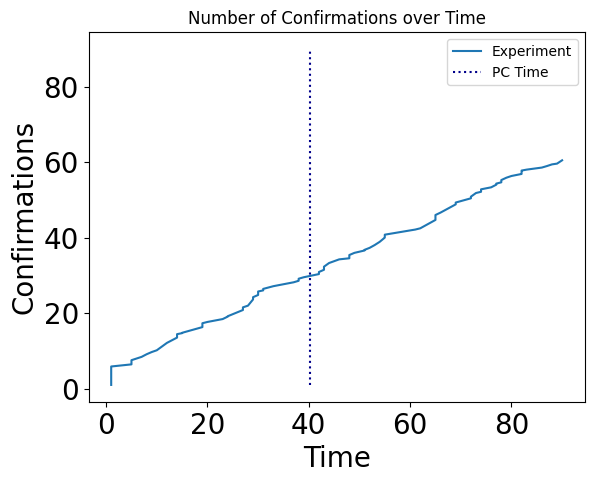

In [3]:
w.plot_confirm_over_time()
print(w.PC_add_time)
a = analyser()
results = a.get_res(100)

[[1, 1.0, 149], [2, 1.0, 138], [3, 1.0, 132], [4, 1.0263157894736843, 152], [5, 1.1644736842105263, 152], [6, 1.9731543624161074, 149], [7, 2.7973856209150325, 153], [8, 3.9036144578313254, 166], [9, 5.653061224489796, 147], [10, 7.085714285714285, 140], [11, 8.145569620253164, 158], [12, 9.617283950617283, 162], [13, 10.987179487179487, 156], [14, 12.408163265306122, 147], [15, 14.238095238095237, 147], [16, 15.707182320441989, 181], [17, 17.393548387096775, 155], [18, 19.21476510067114, 149], [19, 20.606060606060606, 165], [20, 22.54320987654321, 162], [21, 23.954838709677418, 155], [22, 25.766666666666666, 120], [23, 26.836601307189543, 153], [24, 27.968553459119498, 159], [25, 29.554140127388536, 157], [26, 31.528301886792452, 159], [27, 32.920731707317074, 164], [28, 34.50322580645161, 155], [29, 35.38297872340426, 141], [30, 37.61333333333334, 150], [31, 38.63265306122449, 147], [32, 39.97794117647059, 136], [33, 42.063291139240505, 158], [34, 43.520270270270274, 148], [35, 44.94

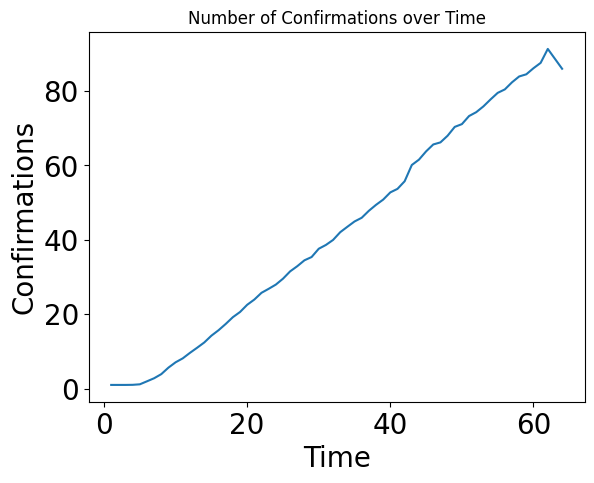

In [4]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

df.to_csv("pc-r3-c5-a40 100")